In [80]:
import matplotlib.pyplot as plt

def show_img(imagen_np, title=""):
    plt.imshow(imagen_np, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Ejercicio 3: Bit Plane Slicing


In [ ]:
import cv2
import numpy as np

In [54]:
getBitPlanes = lambda image: [(image & (1 << i)) for i in range(8)]

In [56]:
def showBitPlane(planes):
  fig, axs = plt.subplots(2, 4, figsize=(12, 6))

  for i, plano in enumerate(planes):
    fil = i // 4
    col = i % 4
    axs[fil, col].imshow(plano, cmap='gray')
    axs[fil, col].set_title(f'Plano de Bits {i}')
    axs[fil, col].axis('off')

  plt.tight_layout()
  plt.show()

## Inciso a

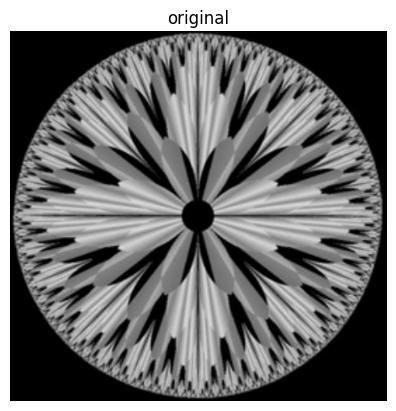

In [17]:
fractal = cv2.imread('fractal.png', 0)
show_img(fractal, "original")

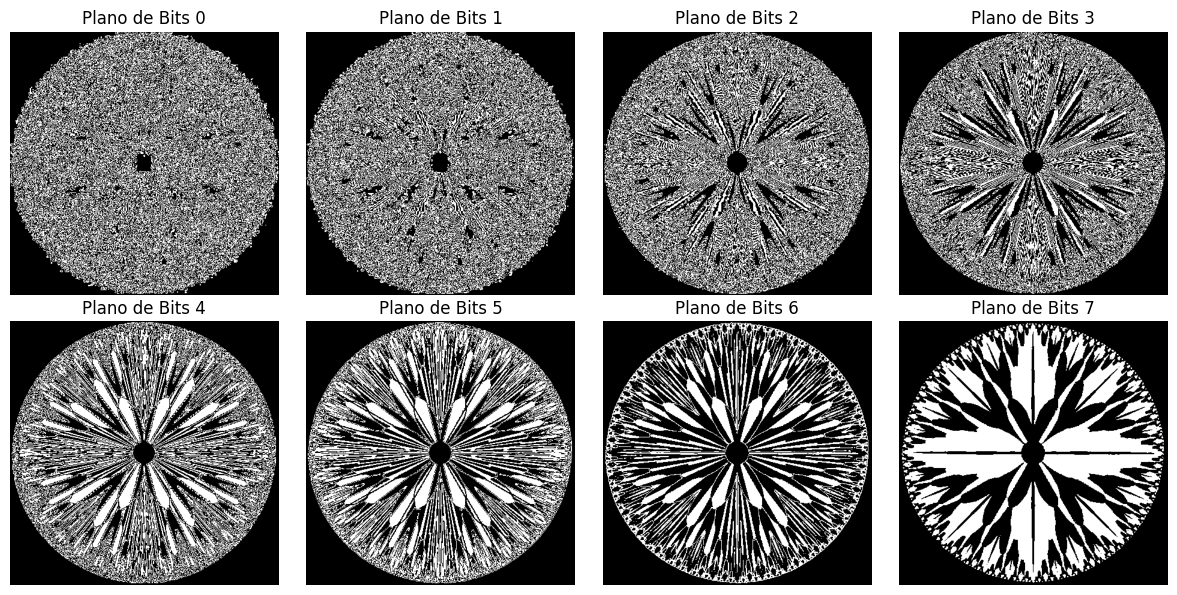

In [57]:
arr_planos = getBitPlanes(fractal)
showBitPlane(arr_planos)

## Inciso b

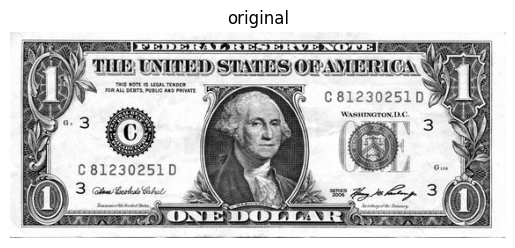

In [18]:
dollar = cv2.imread('onedollar.jpg', 0)
show_img(dollar, "original")

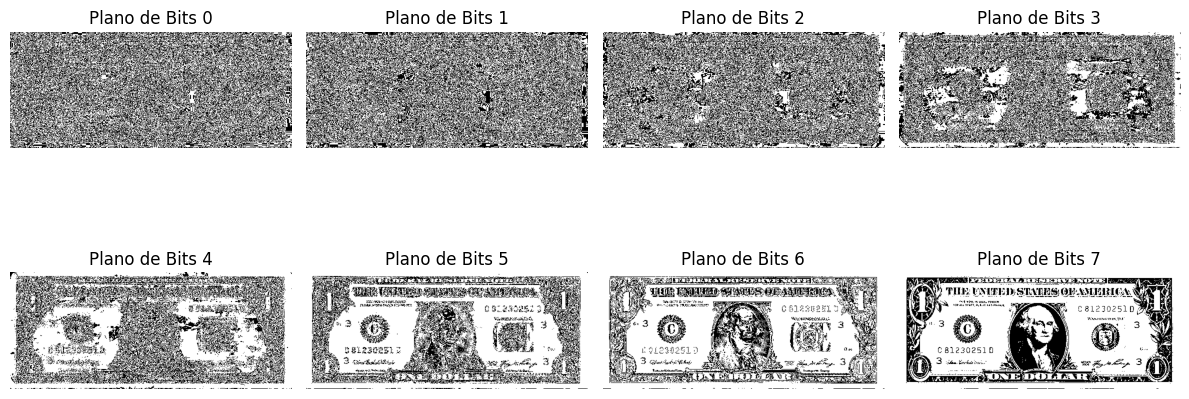

In [61]:
dollar_planos = getBitPlanes(dollar)
showBitPlane(dollar_planos)

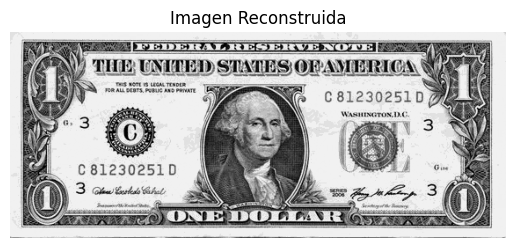

In [63]:
planos_sel = [1,5,6,7,8]

rec_img = np.zeros(dollar.shape)

for plano in planos_sel:
  rec_img = rec_img + dollar_planos[plano-1]

show_img(rec_img, "Imagen Reconstruida")

# Ejercicio 7: HDR

In [68]:
filenames = ["office_1.jpg", "office_2.jpg", "office_3.jpg", "office_4.jpg", "office_5.jpg", "office_6.jpg"]
times = np.array([ 1/30.0, 0.1, 1/3.0, 0.625, 1.3, 4.0 ], dtype=np.float32)
images = [cv2.imread(filename) for filename in filenames]

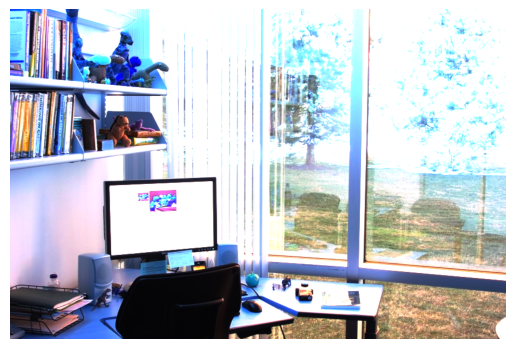

In [81]:
# Align input images
alignMTB = cv2.createAlignMTB().process(images, images)

# Obtain Camera Response Function (CRF)
responseDebevec = cv2.createCalibrateDebevec().process(images, times)

# Merge images into an HDR linear image
hdrDebevec = cv2.createMergeDebevec().process(images, times, responseDebevec)

show_img(hdrDebevec)

Para corregir la foto decidimos aplicar la [corrección de Reinhard](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.106.8100&rep=rep1&type=pdf).

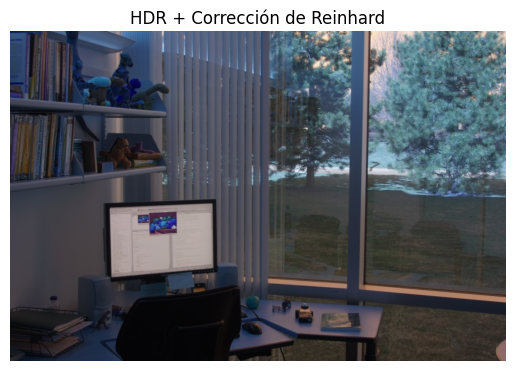

In [82]:
# Tonemap using Reinhard's method to obtain 24-bit color image
ldrReinhard = cv2.createTonemapReinhard(1.5, 0,0,0).process(hdrDebevec)
show_img(ldrReinhard, "HDR + Corrección de Reinhard")